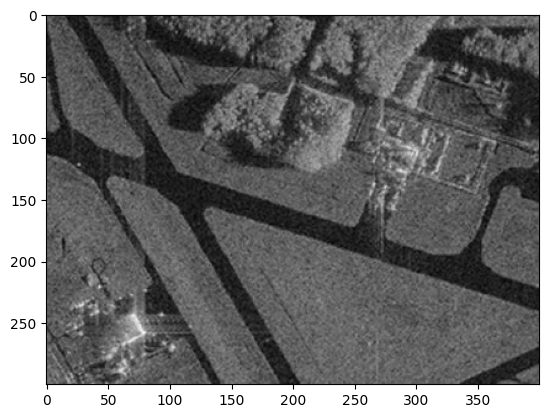

In [169]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

image = cv2.imread('sar_1-2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

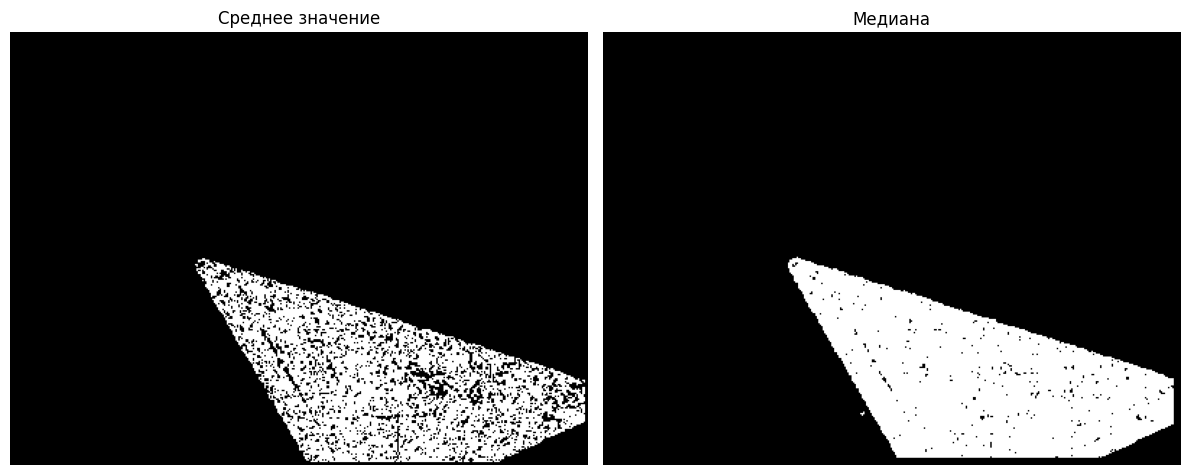

In [171]:
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])

    if abs(av_val - img[point]) <= T:
        return True

    return False


def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask

    return mask*255

def homo_median(img, mask, point, T):
    region_vals = img[mask > 0]
    med_val = np.median(region_vals)
    return abs(med_val - img[point]) <= T


seed_point = (250,250)
mask = region_growing(image_gray,seed_point,homo_average,2, 10)

seed_point1 = (200,200)
mask1 = region_growing(image_gray, seed_point1, homo_median, 5, 20)

plt.figure(figsize=(12, 10))

plt.subplot(1,2,1)
plt.imshow(mask, cmap="gray")
plt.title('Среднее значение')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask1, cmap="gray")
plt.title('Медиана')
plt.axis('off')

plt.tight_layout()
plt.show()


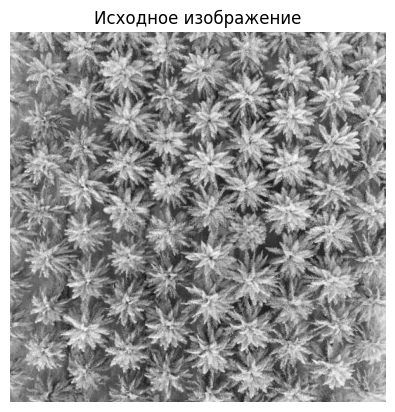

In [161]:
image = cv2.imread('palm_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

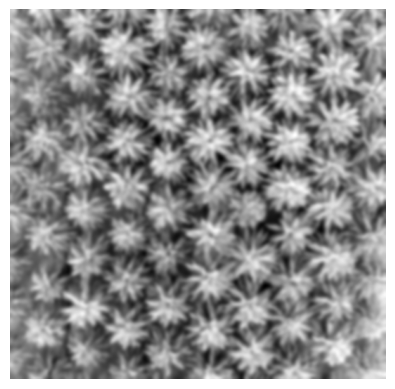

In [162]:
blur = cv2.GaussianBlur(image_gray, (15, 15), 0)
plt.imshow(blur, cmap="gray")
plt.axis('off')
plt.show()

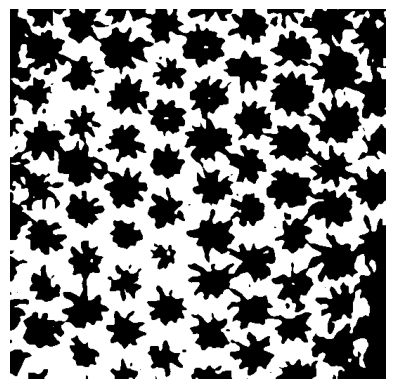

In [163]:
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")
plt.axis('off')
plt.show()

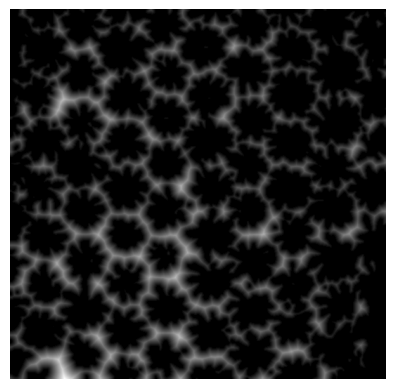

In [164]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
plt.imshow(dist, cmap="gray")
plt.axis('off')
plt.show()

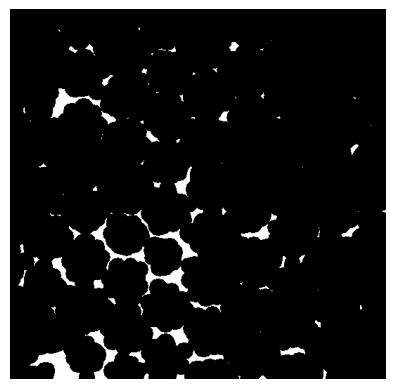

In [165]:
ret, sure_fg = cv2.threshold(dist, 0.4 * dist.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg, cmap="gray")
plt.axis('off')
plt.show()

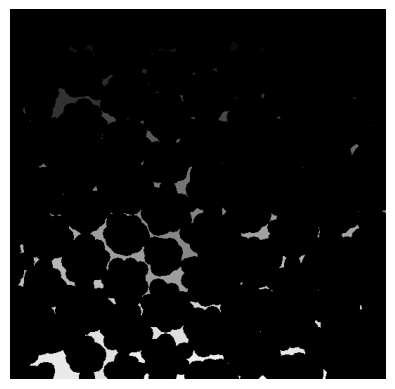

In [166]:
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, cmap="gray")
plt.axis('off')
plt.show()

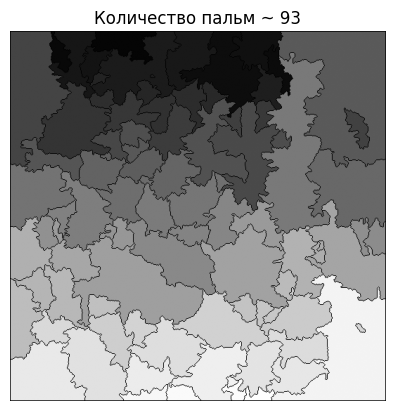

In [167]:
markers = cv2.watershed(image, markers)
plt.imshow(markers, cmap="gray")
plt.title(f'Количество пальм ~ {len(np.unique(markers))}')
plt.axis('off')
plt.show()